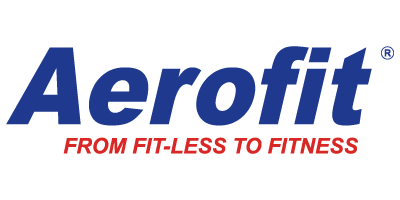

# **1. Importing Python Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px 

# **2. Importing the Dataset**

In [6]:
#usuing Pandas librbary for reading the dataset
aerofit_df = pd.read_csv('aerofit_treadmill.csv')

### **2.1  Analysing first few rows**

In [8]:
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### **2.2 Finding out Shape and Dimensionality of the Dataset**

In [10]:
#shape of the dataset
aerofit_df.shape

(180, 9)

In [11]:
#dimentsion of the dataset
aerofit_df.ndim

2

### **2.3 Extracting datatype of all columns**

In [13]:
#datatypes of all columns
aerofit_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

### **2.4 Extracting Dataset's information**

In [15]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are 180 rows in this dataset and as you can see above, there are no null values for any of the column.

This implies that the data collection process was carried out with perfection, which is a positive sign for data analysis and does not require imputation of missing data/values. 

This ensures that the analysis performed on this dataset is based on the entire dataset without any data gaps.


### **2.5 Extracting Descriptive statistics**

In [18]:
#for numerical columns
aerofit_df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [19]:
#for object type columns
aerofit_df.describe(include = 'object').round(2)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


# **3. Finding the counts of each categorical variable, using both: Graphical and Non Graphical Analysis**

### **3.1 Count of Categorical Variables using Non Graphical Analysis**

In [493]:
cat_cols = ['Product', 'Gender', 'MaritalStatus']

val_count = {}

for col in cat_cols:
    val_count[col] = aerofit_df[col].value_counts()

for col, counts in val_count.items():
    print(f'\nValue counts for {col}: ')
    print(counts)


Value counts for Product: 
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Value counts for Gender: 
Gender
Male      104
Female     76
Name: count, dtype: int64

Value counts for MaritalStatus: 
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


### **3.2 Count of Categorical Variables using Graphical Analysis**

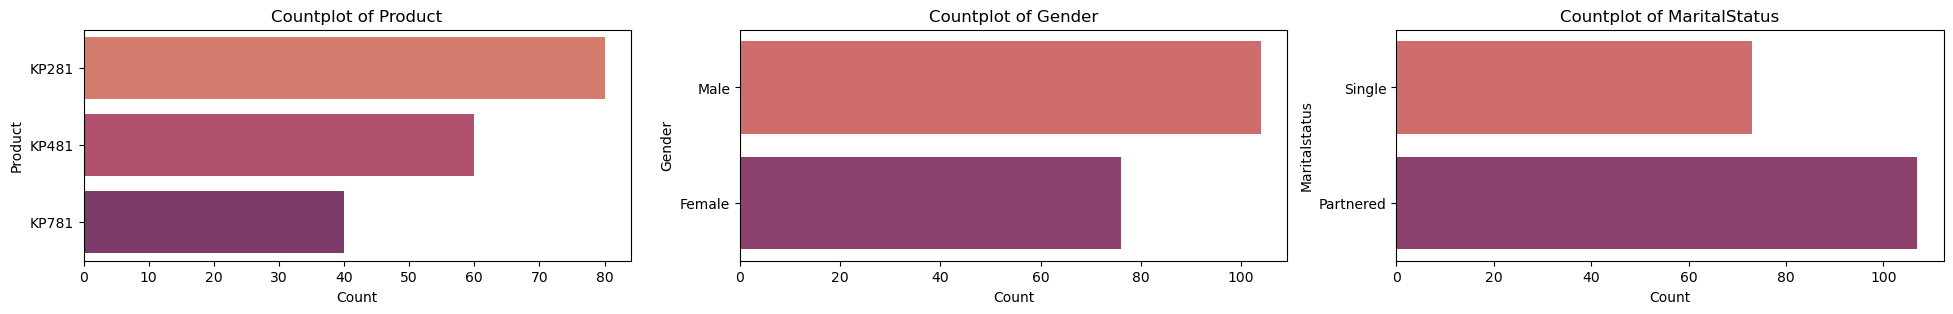

In [24]:
cat_cols = ['Product', 'Gender', 'MaritalStatus']

fig, axes = plt.subplots(1, 3, figsize = (24,3))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data = aerofit_df, y = col, ax = axes[i], palette = 'flare')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col.capitalize())
    axes[i].tick_params(axis = 'y', labelsize = 10)
    axes[i].tick_params(axis = 'x', labelsize = 10)
plt.show()

**Insights:**


*1. Product:*

During the past 3 months, the **KP281** product demostarted the most sales out of the 3 products, accounting for approximately for almost 44% for the sales.

*2. Gender:*

In the past 3 months, around 58% of the buyers were Male and 42% were female.

*3. Marital Status:*

Based on the data of the past 3 months, around 60% of buyers married and 40% were bachelors.

# **4. Outlier Detection**

### **4.1 Using Boxplots for visualising Outliers**

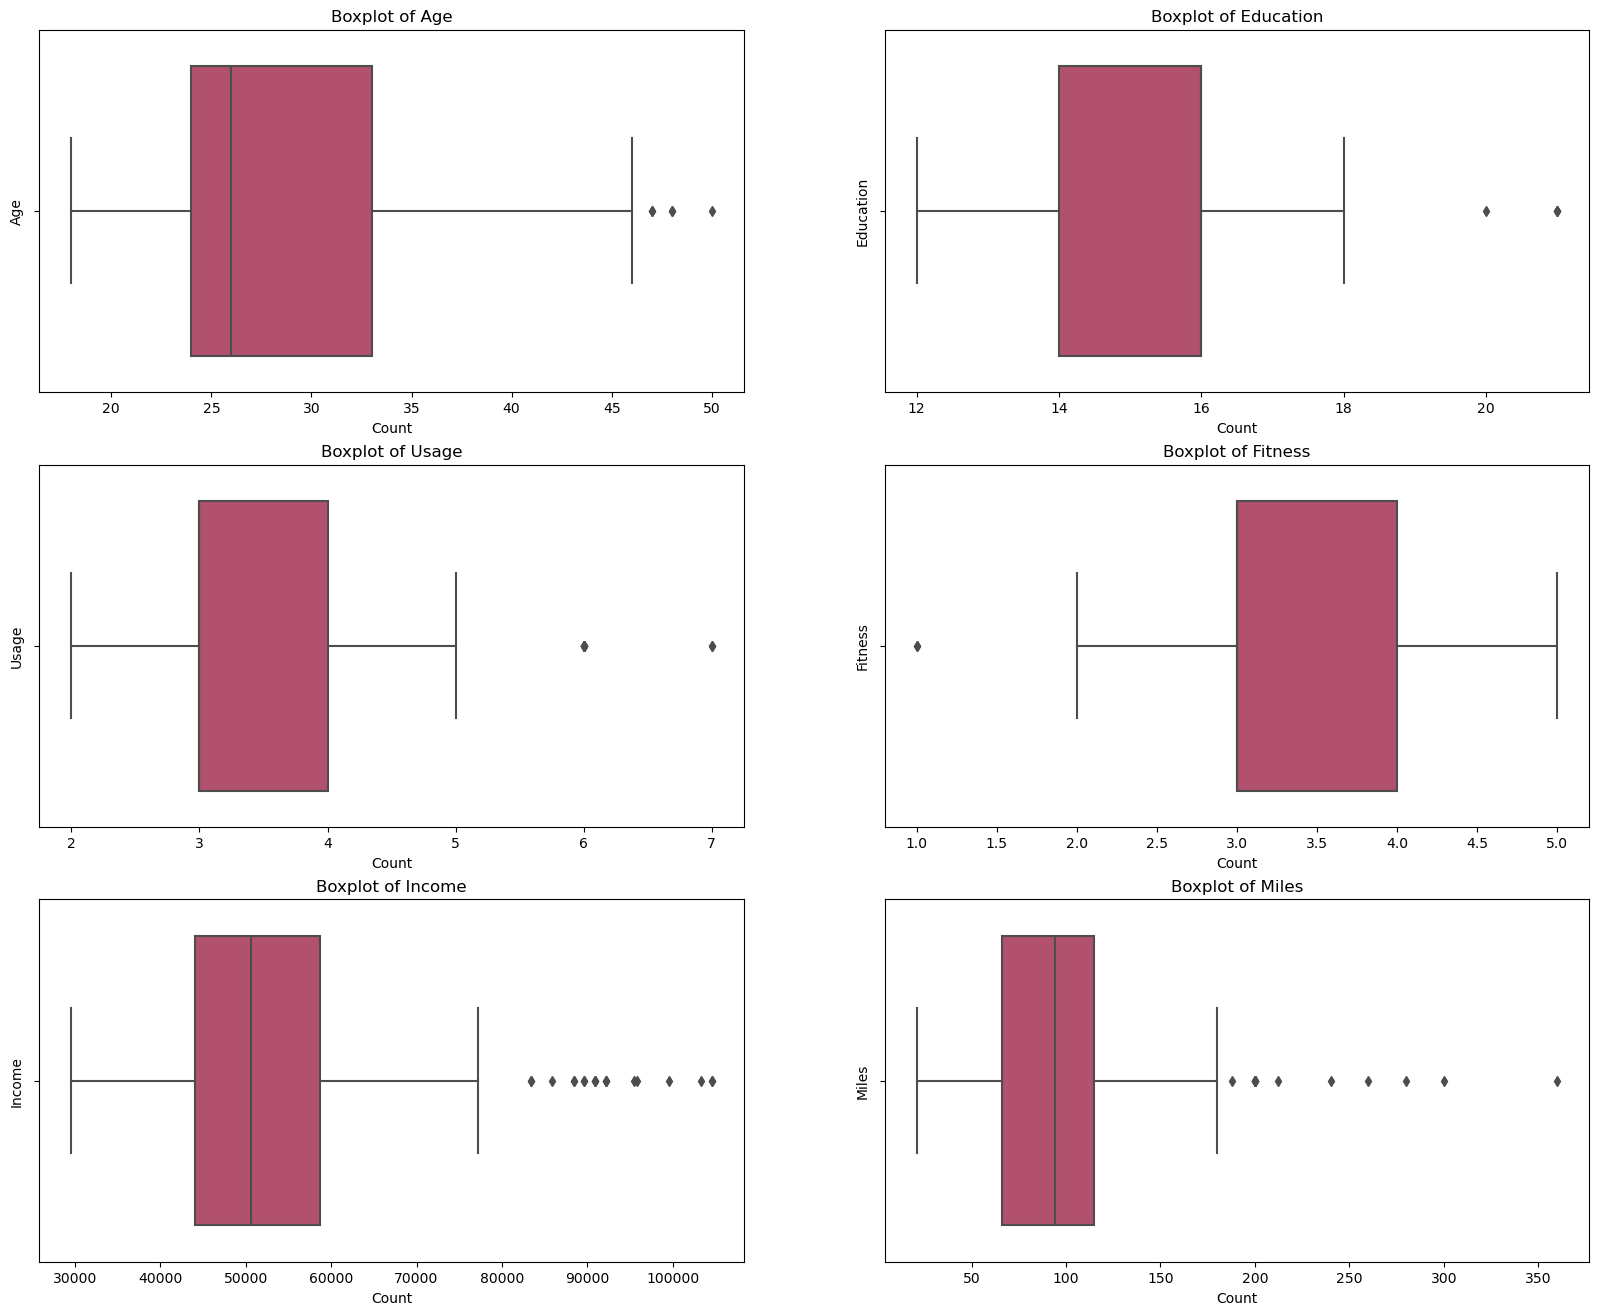

In [28]:
num_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

fig, axes = plt.subplots(3, 2, figsize = (20,16))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data = aerofit_df, x = col, orient = 'h', ax = axes[i], palette = 'flare')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
plt.show()

### **4.2 Outlier Detection without Visualisation**

In [30]:
def outliers(df, col):
    #calculate quartiles and IQR for specific columns
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    #outliers outside upper whisker
    upper_band = Q3 + 1.5*IQR
    lower_band = Q1 - 1.5*IQR
    #outlier in the selected column
    outliers_df = df[(df[col] > upper_band) | (df[col] < lower_band)]

    return outliers_df

In [31]:
print(f"Total Number of Outliers for 'Age' column: {len(outliers(aerofit_df, 'Age'))}", "\n")
outliers(aerofit_df, 'Age')

Total Number of Outliers for 'Age' column: 5 



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [32]:
print(f"Total Number of Outliers for 'Education' column: {len(outliers(aerofit_df, 'Education'))}", "\n")
outliers(aerofit_df, 'Education')

Total Number of Outliers for 'Education' column: 4 



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


In [33]:
print(f"Total Number of Outliers for 'Usage' column: {len(outliers(aerofit_df, 'Usage'))}", "\n")
outliers(aerofit_df, 'Usage')

Total Number of Outliers for 'Usage' column: 9 



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


In [34]:
print(f"Total Number of Outliers for 'Fitness' column: {len(outliers(aerofit_df, 'Fitness'))}", "\n")
outliers(aerofit_df, 'Fitness')

Total Number of Outliers for 'Fitness' column: 2 



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


In [35]:
print(f"Total Number of Outliers for 'Income' column: {len(outliers(aerofit_df, 'Income'))}", "\n")
outliers(aerofit_df, 'Income')

Total Number of Outliers for 'Income' column: 19 



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [36]:
print(f"Total Number of Outliers for 'Miles' column: {len(outliers(aerofit_df, 'Miles'))}", "\n")
outliers(aerofit_df, 'Miles')

Total Number of Outliers for 'Miles' column: 13 



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


### **4.3 Using '.describe()' method in checking the difference between mean and median for every attribute**

In [39]:
num_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

cat_desc = aerofit_df.describe()

outliers = []

for cols in num_cols:
    means = cat_desc.loc['mean', cols].round(2)
    medians = aerofit_df[cols].median()
    difference = np.abs(means - medians)
    outliers.append({'Attribute' : cols, 'Mean' : means, 'Median' : medians, 'Difference' : difference})

outliers_df = pd.DataFrame(outliers)
outliers_df
    

,Attribute,Mean,Median,Difference
0,Age,28.79,26.0,2.79
1,Education,15.57,16.0,0.43
2,Usage,3.46,3.0,0.46
3,Fitness,3.31,3.0,0.31
4,Income,53719.58,50596.5,3123.08
5,Miles,103.19,94.0,9.19


***Insights:***

The following attributes have significant differences between their mean and median values, indicating potential skewness in their distributions:

**1. Age:** The mean age (28.79 years) is higher than the median age (26.0 years), with a difference of approximately 2.79 years. This suggests a right-skewed distribution, where some customers are older than the majority.

**2. Usage:** The mean usage (3.46 times per week) is higher than the median usage (3.0 times per week), with a difference of approximately 0.46 times. This suggests that some customers use the treadmill more frequently than the majority.

**3. Income:** The mean income (53,729.58 dollars) is higher than the median income (50,596.5 dollars), with a difference of approximately 3,123.08 dollars. This indicates a right-skewed distribution, with some customers having higher incomes than the majority.

**4. Fitness:** The mean fitness rating (3.31) is higher than the median fitness rating (3.0), with a difference of approximately 0.31. This suggests that some customers rate their fitness higher than the majority.

**5. Miles**: The mean expected miles (103.19) is higher than the median expected miles (94.0), with a difference of approximately 9.19 miles. This indicates that some customers expect to walk or run more miles each week than the majority.

# **5. Creating a new Dataset by adding these two columns for better analysis: 'Product Level' & 'Product Price'**

In [43]:
data_dict = {
    'Product' : ['KP281', 'KP481', 'KP781'],
    'Product Level' : ['Entry-level', 'Mid-level', 'Advance-level'],
    'Product Price' : [1500, 1750, 2500]
}

Treadmill_data = pd.DataFrame(data_dict)
Treadmill_data


,Product,Product Level,Product Price
0,KP281,Entry-level,1500
1,KP481,Mid-level,1750
2,KP781,Advance-level,2500


In [45]:
aerofit_df_new = aerofit_df.merge(Treadmill_data, on = 'Product')
aerofit_df_new

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product Level,Product Price
0,KP281,18,Male,14,Single,3,4,29562,112,Entry-level,1500
1,KP281,19,Male,15,Single,2,3,31836,75,Entry-level,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,Entry-level,1500
3,KP281,19,Male,12,Single,3,3,32973,85,Entry-level,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,Entry-level,1500
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Advance-level,2500
176,KP781,42,Male,18,Single,5,4,89641,200,Advance-level,2500
177,KP781,45,Male,16,Single,5,5,90886,160,Advance-level,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,Advance-level,2500


# **6. Analysing if Marital Status, Gender and Age have any effect on the product purchased.**

### **6.1 Categorical Columns V/S Product Purchased**

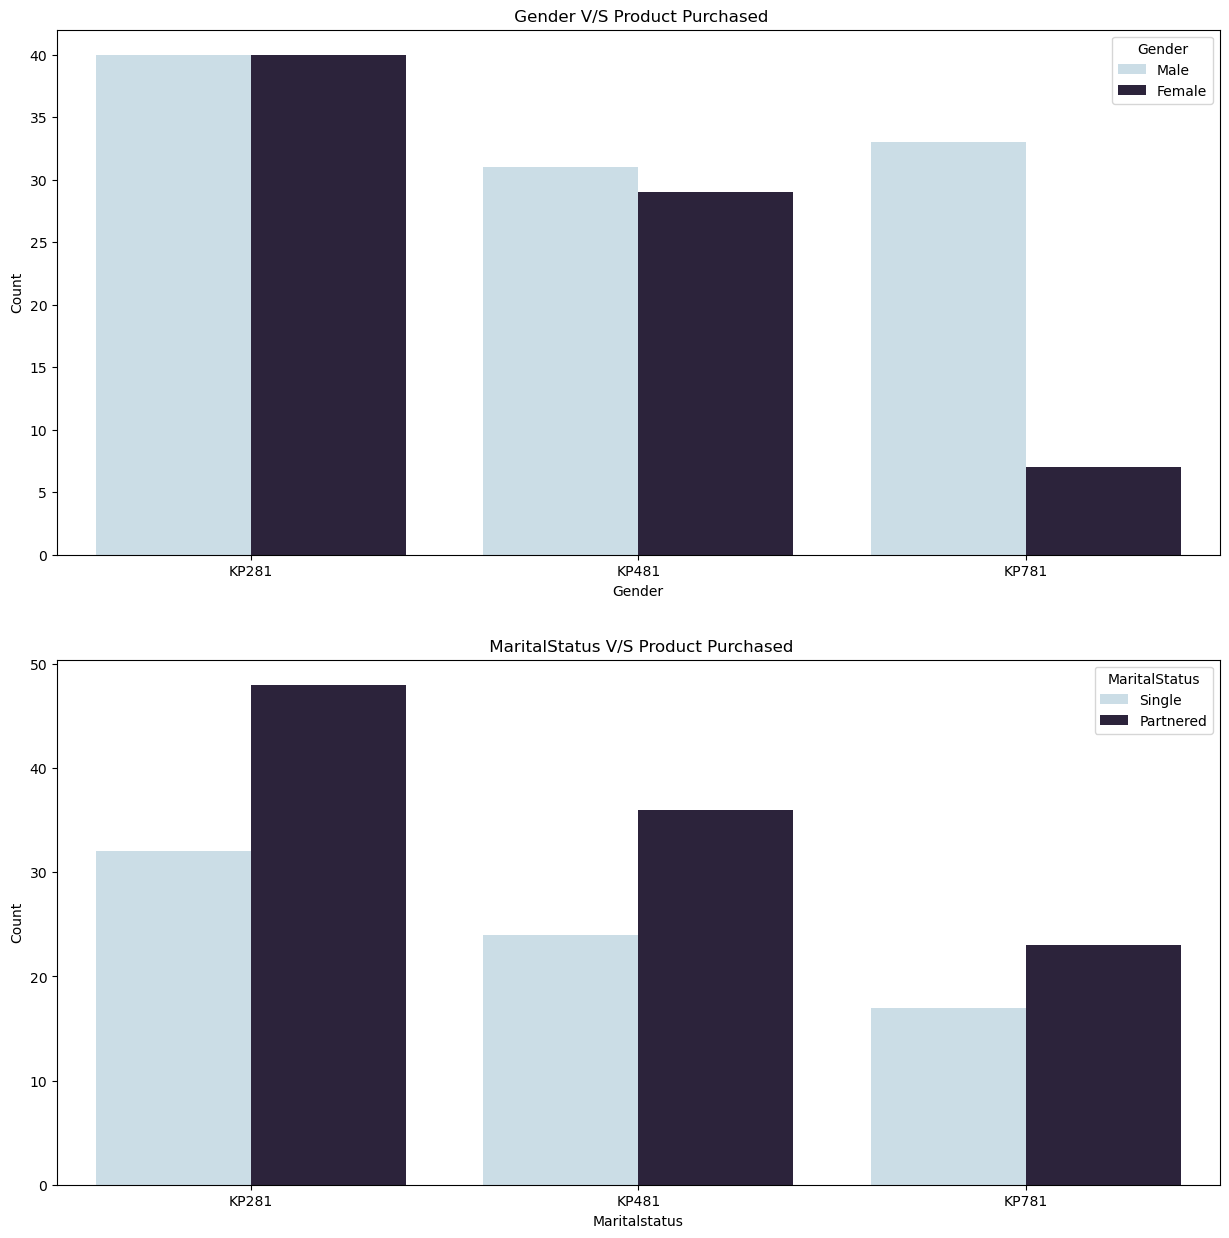

In [49]:
cat_cols = ['Gender', 'MaritalStatus']

fig, axes = plt.subplots(2, 1, figsize = (15,15))
axes = axes.flatten()

for i, cols in enumerate(cat_cols):
    sns.countplot(data = aerofit_df, hue = cols, x = 'Product', ax = axes[i], palette = 'ch:s=.25,rot=-.25')
    axes[i].set_title(f" {cols} V/S Product Purchased")
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(cols.capitalize())
    axes[i].tick_params(axis = 'y', labelsize = 10)
    axes[i].tick_params(axis = 'x', labelsize = 10)
plt.show()

***Insights:***

**1. Gender V/S Product Purchased:** The above chart suggests that Products: KP281 and KP481 were the most common purchases between both the genders. Whereas, Product KP781 wasn't as popular among the Female customers as compared to Male customers. 

**2. Marital Status V/S Product Purchased:** The above chart indicates that purchased of any Product (treadmill) was more among the customers who are married in comparison with customers who are single/bachelor.

### **6.2 Univariate Analysis**

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

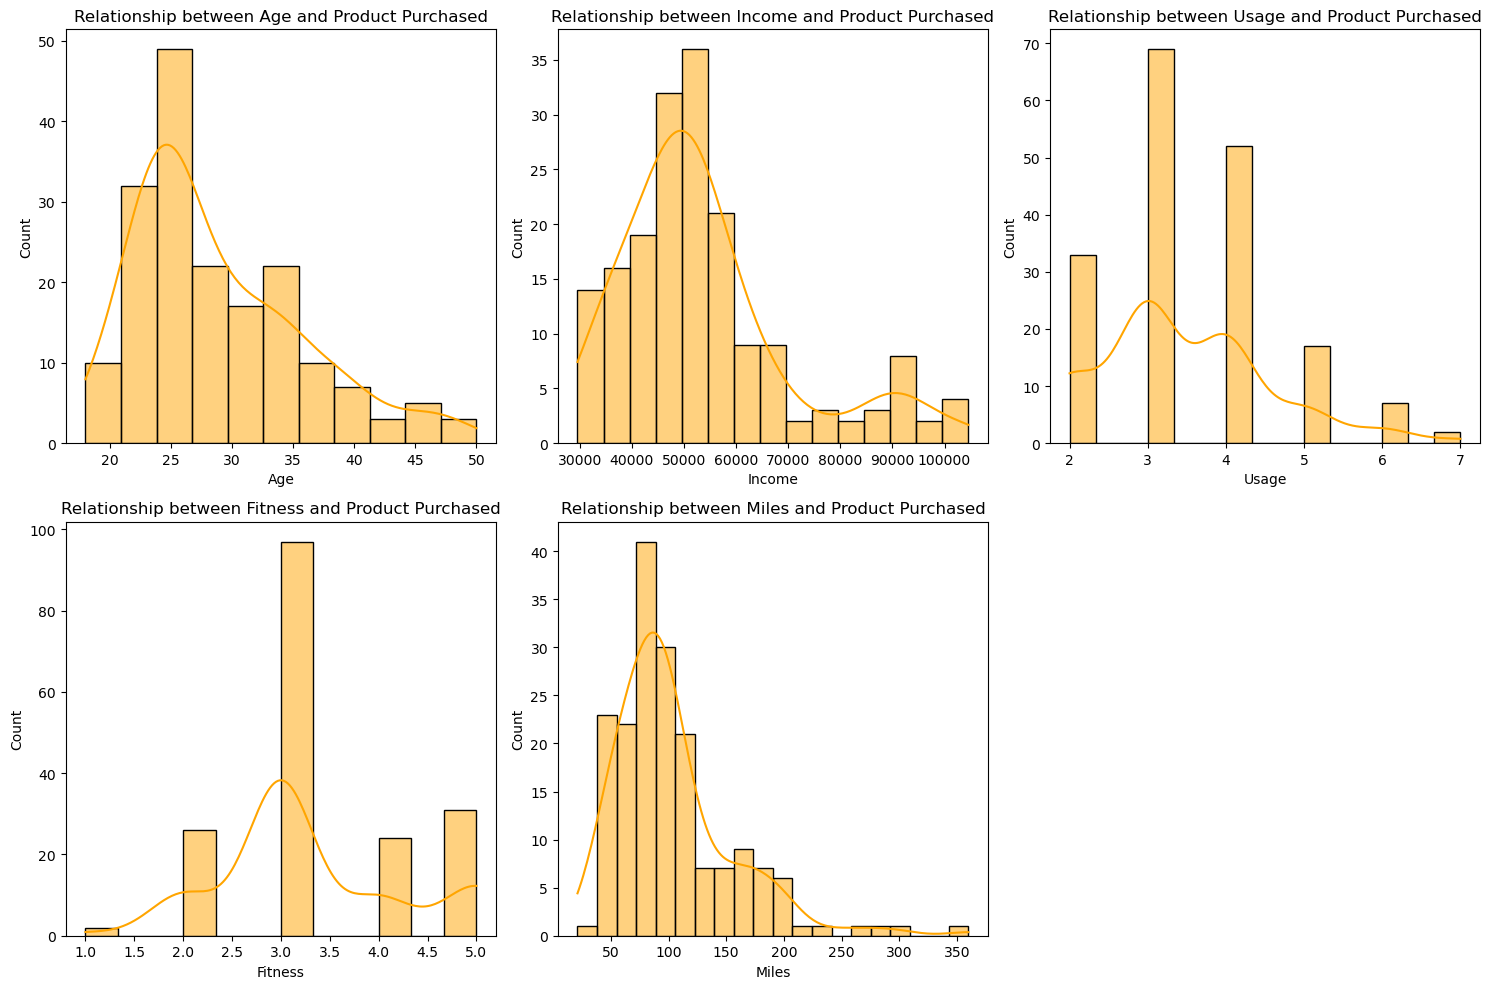

In [135]:
# Continuous variables
continuous_vars = ['Age', 'Income', 'Usage', 'Fitness', 'Miles']

plt.figure(figsize=(15, 10))

# Iterate over the continuous variables to create scatter plots
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(x = aerofit_df[col], color = 'Orange', kde = True)
    plt.title(f'Relationship between {col} and Product Purchased')

plt.tight_layout()
plt.show()

***Insights:***

**1. Age:** The majority of customers fall in the age rannge of 22 years to 36 years, indicating a concetration of users in the young to early-mid adulthood demographic.

**2. Income:** The median income falls around $50,596.5 indicating a middle-income range among the customers.

**3. Usage:** The average treadmill usage is 3 to 4 times a week, suggesting a moderate and consistent engagement in treadmill activities among the customers/users.

**4. Fitness:** The maojority of customers/users rate their fitness between 3 and 4, reflecting a moderate to good fitness level among the sample.

**5. Miles:** Most individuals aim to walk between approximately between 40 to 130 miles weekly, with some exceeding 175 miles. 

### **6.3 Bivariate Analysis**

In [146]:
#creating a crosstab function

crosstab_func = lambda x, y, df: pd.crosstab(df[x], df[y])

In [148]:
crosstab_func('Age', 'Gender', aerofit_df)

Gender,Female,Male
Age,,
18,0,1
19,1,3
20,2,3
21,3,4
22,3,4
23,7,11
24,6,6
25,10,15
26,6,6


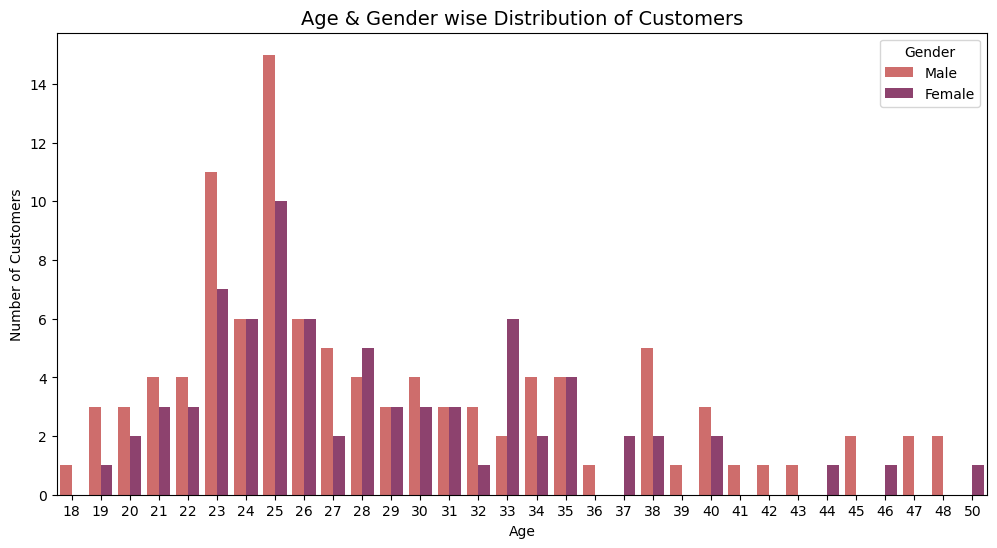

In [154]:
plt.figure(figsize = (12,6))
sns.countplot(data = aerofit_df, x = 'Age', hue = 'Gender', palette = 'flare')
plt.title('Age & Gender wise Distribution of Customers', fontsize = 14)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

***Insights:***

**1.** The distribution of age among male and female customers indicates a diverse representation, with individuals ranging from 18 to 50 years old.

**2.** In the age group between 23 and 25, there is a noticeable increase in the number of females compared to male customers.

# **7. Representing the Probability**

### **7.1 Marginal probability of each product**

In [371]:
(pd.crosstab(aerofit_df['Product'], aerofit_df['Gender'], normalize = True, margins = True)*100).round(2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


### **7.2 Probability that the customer buys a product based on each column**

In [260]:
all_cols = ['Age', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']

for col in all_cols:
    crosstab = pd.crosstab(aerofit_df['Product'], aerofit_df[col], normalize='all', margins=True) * 100
    print(f"Crosstab for {col}:\n", crosstab.round(2), "\n")

Crosstab for Age:
 Age        18    19    20    21    22     23    24     25    26    27  ...  \
Product                                                                ...   
KP281    0.56  1.67  1.11  2.22  2.22   4.44  2.78   3.89  3.89  1.67  ...   
KP481    0.00  0.56  1.67  1.67  0.00   3.89  1.67   6.11  1.67  0.56  ...   
KP781    0.00  0.00  0.00  0.00  1.67   1.67  2.22   3.89  1.11  1.67  ...   
All      0.56  2.22  2.78  3.89  3.89  10.00  6.67  13.89  6.67  3.89  ...   

Age        41    42    43    44    45    46    47    48    50     All  
Product                                                                
KP281    0.56  0.00  0.56  0.56  0.00  0.56  0.56  0.00  0.56   44.44  
KP481    0.00  0.00  0.00  0.00  0.56  0.00  0.00  0.56  0.00   33.33  
KP781    0.00  0.56  0.00  0.00  0.56  0.00  0.56  0.56  0.00   22.22  
All      0.56  0.56  0.56  0.56  1.11  0.56  1.11  1.11  0.56  100.00  

[4 rows x 33 columns] 

Crosstab for Education:
 Education    12    13     14  

### **7.3 Computing Conditional Probability**

#### **7.3.1 Computing conditional probability of purchasing different products, given that the customer is a male/female** 

In [392]:
cp_of_gender = (pd.crosstab(aerofit_df['Product'], aerofit_df['Gender'], margins = True, normalize = 'columns')*100).T.round(2)
cp_of_gender

Product,KP281,KP481,KP781
Gender,,,
Female,52.63,38.16,9.21
Male,38.46,29.81,31.73
All,44.44,33.33,22.22


***Insight:***

**1.** Probability of Female customers buying KP281 (52.63%) is more than male customers (38.46%).

**2.** Probability of Male customers buying KP781 (31.73%) is more than male customers (9.21%).

**3.** KP481 product is specifically recommended for Female customers who are intermediate user. 

#### **7.3.2 Computing conditional probability of purchasing different products, given that the customer is single/partnered**

In [385]:
cp_of_marital = (pd.crosstab(aerofit_df['Product'], aerofit_df['MaritalStatus'], margins = True, normalize = 'columns')*100).T.round(2)
cp_of_marital

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.86,33.64,21.50
Single,43.84,32.88,23.29
All,44.44,33.33,22.22


***Insights:***

**1.** KP281 is slightly more favoured by partnered customers (44.86%) compared to single customers (43.84%).

**2.** KP481 enjoys consistent popularity across both partnered (33.64%) and single (32.88%) customers.

**3.** KP781, an advanced product, has a lower probability of selection and shows slightly higher preference among single customers (23.29%) compared to partnered customers (21.50%).

# **8. Correlation analysis among different factors**

### **8.1 Correlation using heatmap**

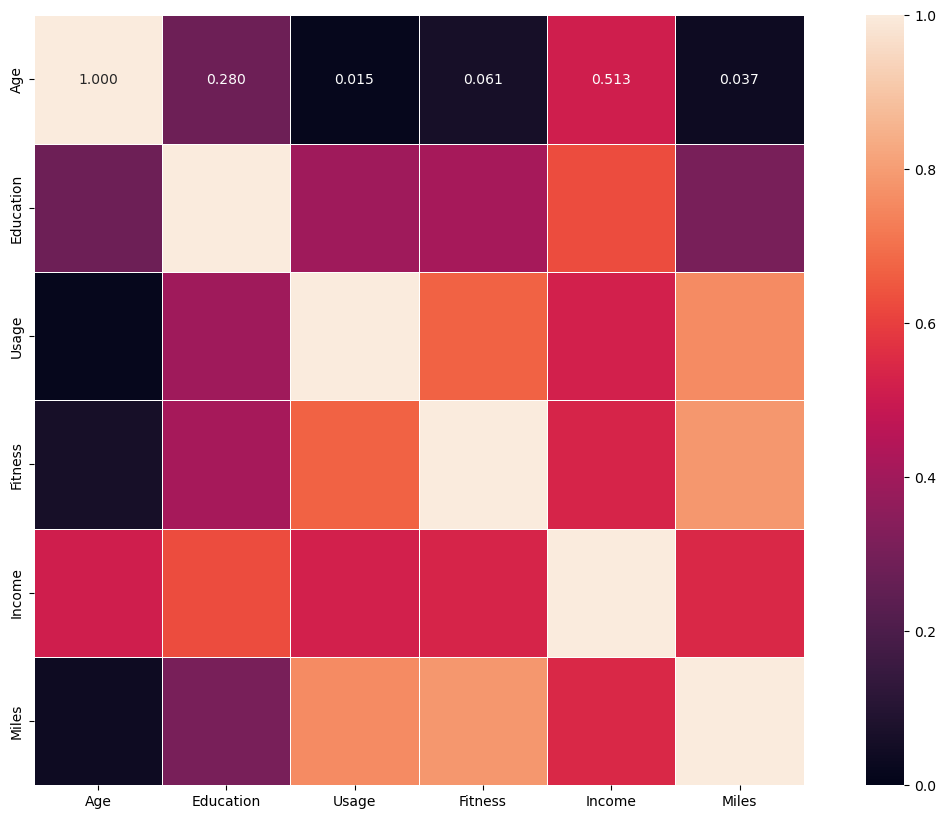

In [427]:
#excluding non-numeric columns
numeric_df = aerofit_df.select_dtypes(include = ['int64'])

#Setting up the heatmap
plt.figure(figsize = (16,10))
ax = sns.heatmap(numeric_df.corr(), annot = True, fmt = '.3f', linewidths = 0.5, cmap = 'rocket', vmin = 0, vmax = 1, square = True)

***Insights***

**1. Age:** Age is positively correlated with Education and Income, indicating that older individuals tend to have higher levels of education and income.

**2. Education:** Education is positively correlated with Income, Usage, and Fitness, suggesting that individuals with higher education levels tend to have higher 
incomes, use the treadmill more frequently, and maintain higher fitness levels.

**3. Usage:**  Usage has strong positive correlations with Fitness and Miles walked per week, indicating that more frequent treadmill usage is associated with
higher fitness levels and covering a greater distance.

**4. Fitness:** Fitness has a strong positive correlation with Miles walked per week, highlighting that individuals with higher fitness levels tend to walk more 
miles per week.

**5. Income:** Income is positively correlated with Age, Education, Fitness, Usage, and Miles walked per week, indicating that individuals with higher incomes tend to be older, more educated, have higher fitness levels, use the treadmill more frequently, and walk more miles per week.

**6. Miles walked per week:** Miles walked per week has the strongest positive correlation with Fitness and a substantial positive correlation with Usage, suggesting that individuals who walk more miles tend to have higher fitness levels and use the treadmill more frequently.

### **8.2 Correlation using Pairplot**

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

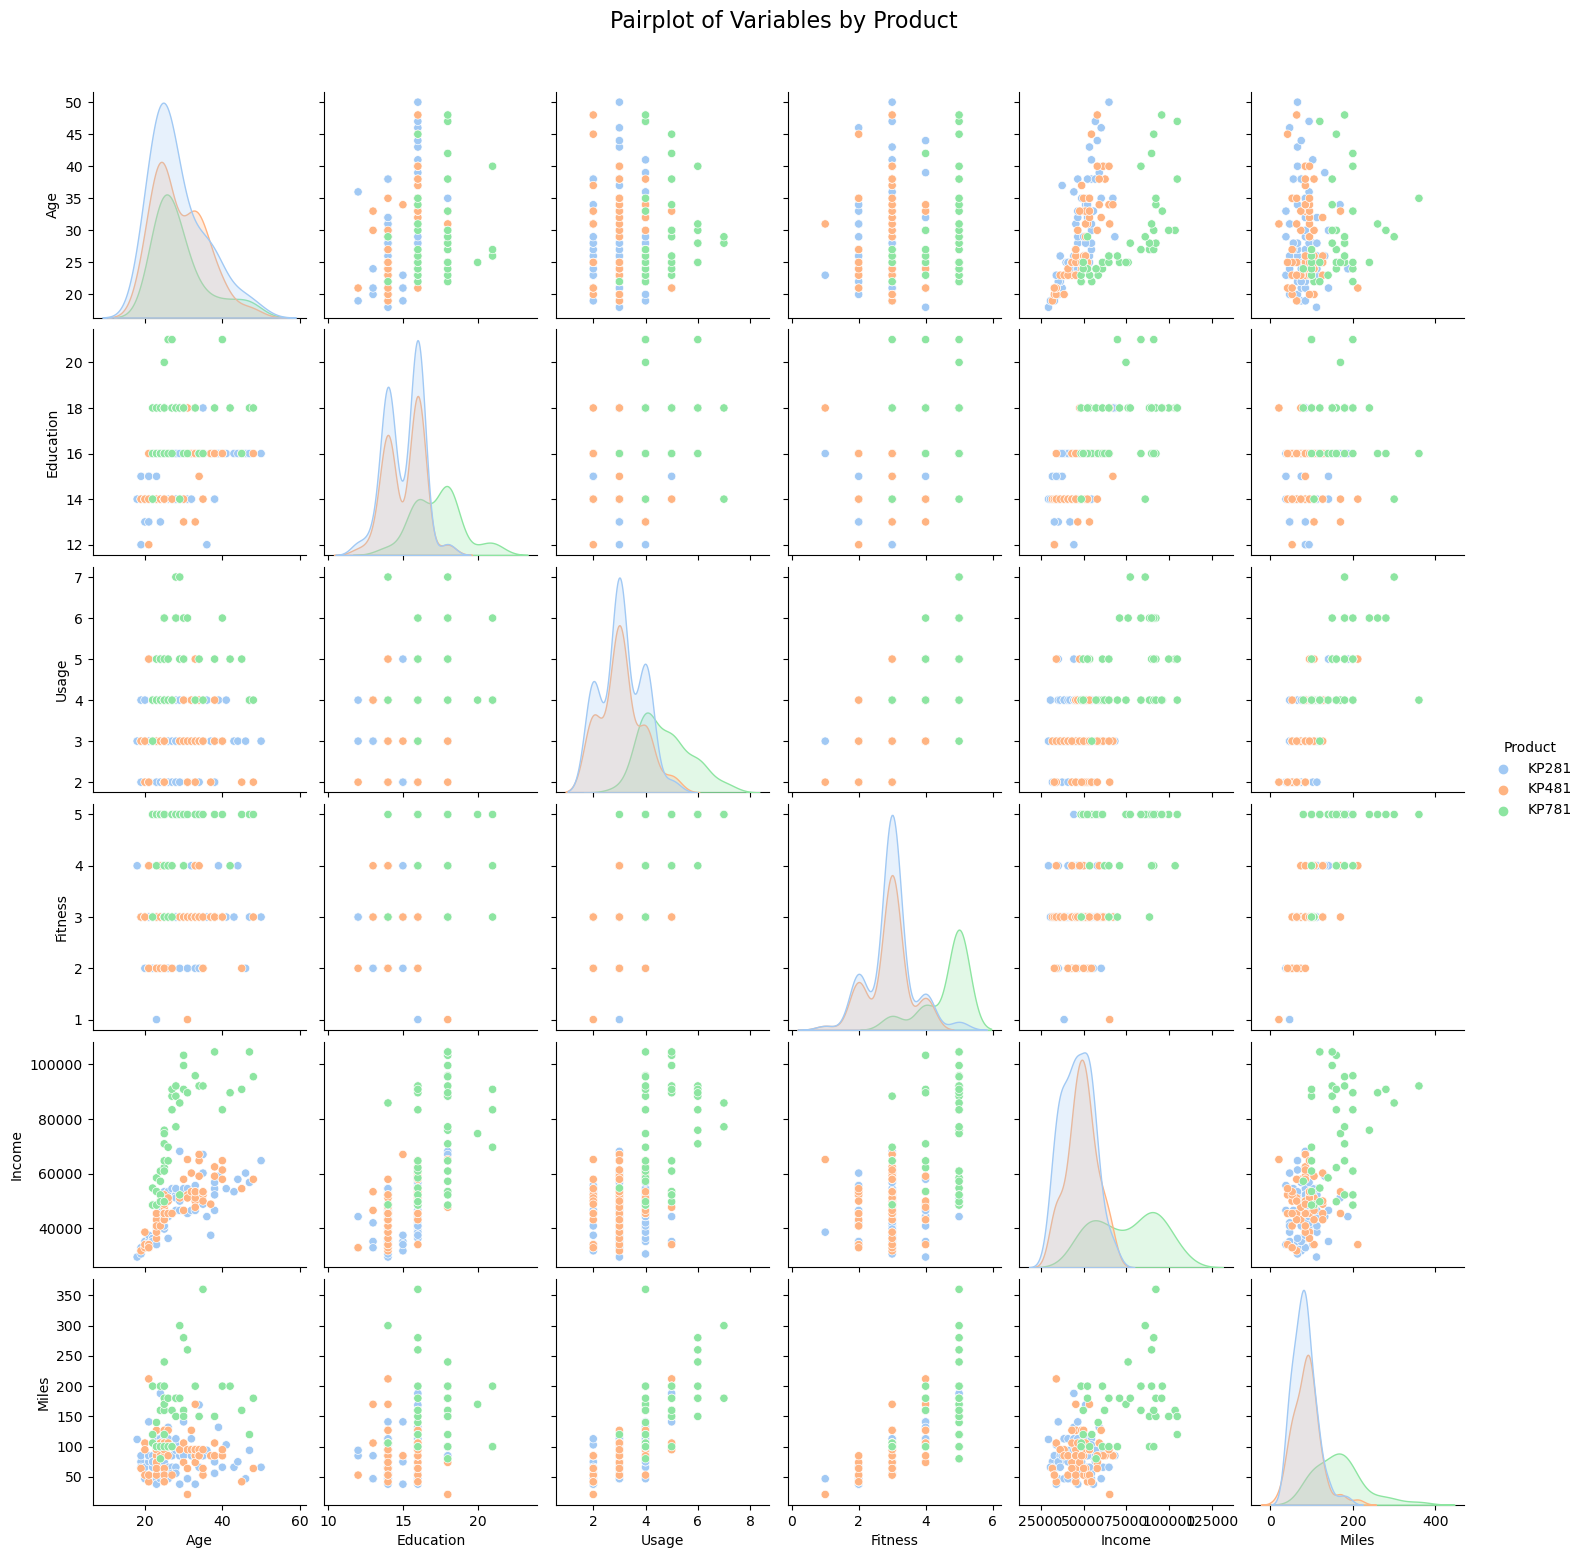

In [470]:
sns.pairplot(aerofit_df, hue = 'Product', palette = 'pastel')
plt.suptitle('Pairplot of Variables by Product', y = 1.04, fontsize = 16)
plt.show()

# **9. Customer Profiling**

### **9.1 KP281**

**- Affordable Entry:** Level Choice: KP281 is a budget-friendly option and the best-selling product.

**- Popularity Among Beginners:** It's favored by entry-level customers, both male and female.

**- Usage Patterns:** Typically used 3 to 4 times a week, covering 70 to 90 miles.

**- Fitness Rating:** Most customers rate their fitness as average.

**- Demographic Preferences:** Attracts younger to elder beginners, especially preferred by single females and partnered males.

**- Income Range:** Preferred by customers with incomes between 39K to 53K.

### **9.2 KP481**

**- Intermediate Level Product:** KP481 is an intermediate-level treadmill.

**- Usage Characteristics:** Customers cover 70 to 130 miles per week, with usage averaging 3 days.

**- Fitness and Mileage Focus:** Fitness level varies from bad to average, and the focus is on covering more miles.

**- Demographic Preferences:** More popular among females, recommended for intermediate female users.

**- Age Groups:** Attracts customers across different age groups - teens, adults, and middle-aged.

**- Income and Relationship Preferences:** Average income around 49K, more preferred by partnered customers.

### **9.3 KP781**

**- Advanced and High-Priced:** KP781 is an advanced and higher-priced product.

**- Distance and Usage:** Customers cover 120 to 200+ miles per week, using it 4 to 5 times.

**- Fitness Rating:** Users rate their fitness as excellent.

**- Demographic Insights:** Preferred by middle to higher age groups, especially single individuals with higher exercise levels.

**- Gender Preference:** More favored by males, especially those with extensive exercise routines.

**- Income Influence:** Preferred by higher-income individuals, correlated with higher education.

**- Experience Factor:** Attracts customers familiar with previous aerofit products.

**- Partnered Preference:** Partnered females show a preference for KP781.

***Recommendations:***

**1. Attracting Female Customers:** To increase female engagement with exercise equipment, consider launching a targeted marketing campaign specifically aimed at encouraging
women to participate in fitness activities.

**2. Strategic Pricing for Budget-Conscious Customers:** Position the KP281 and KP481 treadmills as budget-friendly options. These models are ideal for customers with an annual income in the range of 39K to 53K dollars.

**3. Highlighting Premium Features:** Promote the KP781 treadmill as a premium product. Leverage its advanced features to attract professionals, athletes, and fitness enthusiasts. Collaborate with influencers and international athletes to enhance visibility.

**4. Exploring Market Expansion:** Investigate the possibility of expanding the market beyond the age of 50. Conduct thorough research to understand potential health benefits and challenges associated with this demographic.

**5. Enhancing Customer Support and Upgrades:** Strengthen your customer support system. Encourage users to consider upgrading from basic treadmill models to higher-level ones based on their consistent usage patterns.

**6. Tailored Promotion for Female Users:** Specifically target female customers who engage in regular exercise routines. Provide clear guidance on the benefits of the KP781 treadmill to make it more appealing.

**7. Age-Specific Marketing:** Customize marketing efforts for individuals aged 40 and above. Highlight health benefits and user-friendly features of the KP781 model to attract this demographic.